importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Here, we have a supervised machine learning based on regression model

In [5]:
# dimensions of the data
df.shape

(1338, 7)

The data contains 1338 rows and 7 columns

In [6]:
# column names

col = []

for i in df.columns:
    col.append(i)

col


['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


In [9]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [10]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- info on df tells us that there are 3 types of data, int64, flot64 and object. But age should be float (let's cross check0

- we observe that there is no missing value

In [12]:
# cross-checking data type

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
# cross-checking missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Verifying unique values in checking float data types
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

charges column is confirmed to be float data. Because this is regression problem more float data will be better, so we can consider bmi as float despite the low numbrer of unique values. age should not be converted to float because the number of unique values is very low, as consequence we will keep it as integer. children can be converted into categorical (object) because there are only 6 classes. 

In [15]:
# let's convert children into object

df['children'] = df['children'].astype(object)

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

In [17]:
# checking for duplicates

duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [19]:
df.duplicated().sum()

1

Only one duplicated row

In [20]:
# let's remove the duplicated row

df1 = df.drop(index = 581)

In [22]:
df1.duplicated().sum()

0

In [23]:
df=df1

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(1337, 7)

Visualising relationship between features and target

In [46]:
# separating columns

col_num = df[['age', 'bmi', 'charges']]
col_cat = df.drop(col_num, axis = 1)


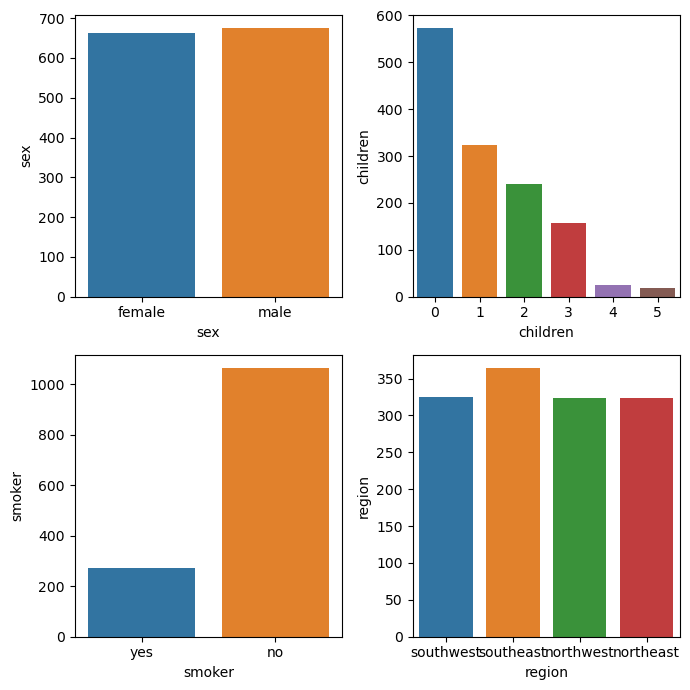

In [61]:
# univariate analising on categorical columns

plt.figure(figsize = (7, 7))

a = 1
for i in col_cat:
    if a<=4:
        plt.subplot(2,2, a)
        sns.countplot(x  = i, data = df)
        plt.ylabel(i)
    a+=1  
    plt.tight_layout()           
    
   

1 - females are almost as equal as males

2 - the count of 'children' column is maximum at class 0, and decreases as number of children in categories/classes decreases, to the lowest at the class 5. This shows that insurees tend not to be having, or very few number of children/dependents

3 - thereare very few smokers as compared to non-smokers

4 - insurees are almost equaly come from each of the four regions

Visualising relationships with categorical columns

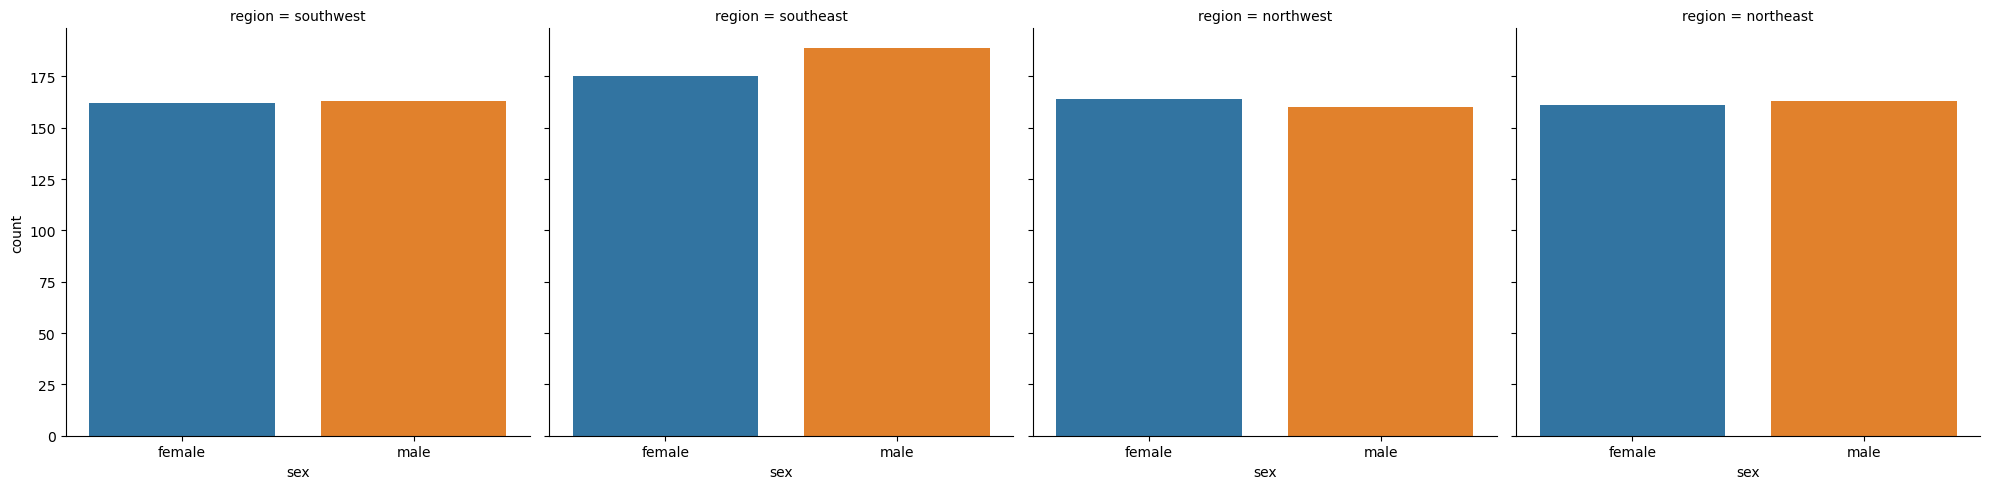

In [70]:
# are females and males equal across region?

sns.catplot(x = 'sex', col = 'region', data = df, kind = 'count')

Yes, males and females are equal across regions

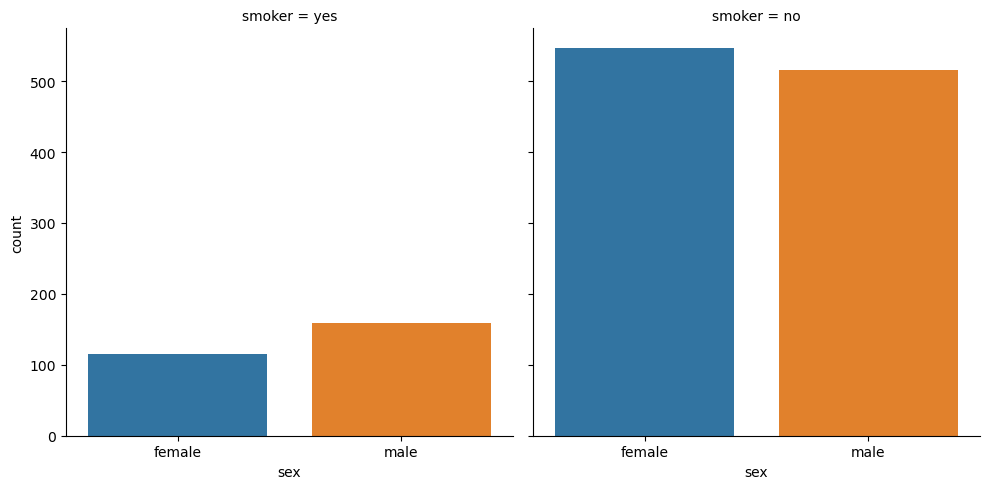

In [71]:
# do females smoke more than females?
sns.catplot(x = 'sex', col = 'smoker', data = df, kind = 'count')

both sex almost equally smoke 

visualising relationship between categorical and target



<AxesSubplot:xlabel='sex', ylabel='charges'>

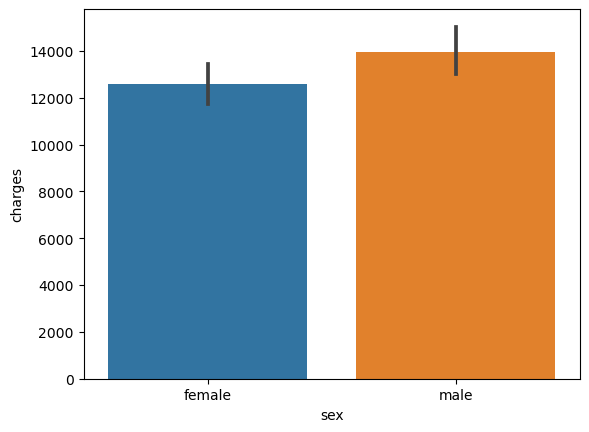

In [66]:
# are charges dependent on sex?
sns.barplot(x = 'sex', y = 'charges', data = df)

We can observe that sex has no influence on charges. So, we can delete sex since it has Negligible influence on the target, meaning it is not an important feature for prediction

<AxesSubplot:xlabel='children', ylabel='charges'>

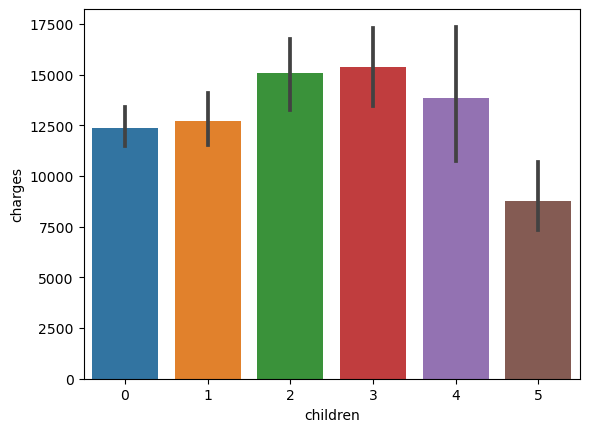

In [72]:
# are charges dependent on children?
sns.barplot(x = 'children', y = 'charges', data = df)

Column 'children' seems to have influemce on 'charges', so we can consider it as important feature for prediction. 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

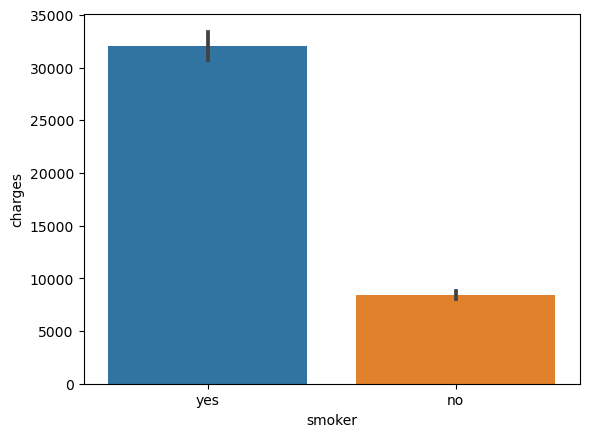

In [73]:
# are charges dependent on smoker?
sns.barplot(x = 'smoker', y = 'charges', data = df)

We can see that smokers have high charges, so 'smoker' is a good feature for prediction

<AxesSubplot:xlabel='region', ylabel='charges'>

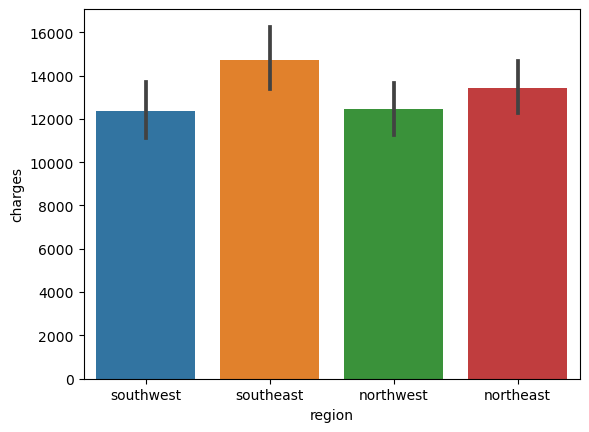

In [74]:
# are charges dependent on region?
sns.barplot(x = 'region', y = 'charges', data = df)

charges somehow vary across region. We will keep this column

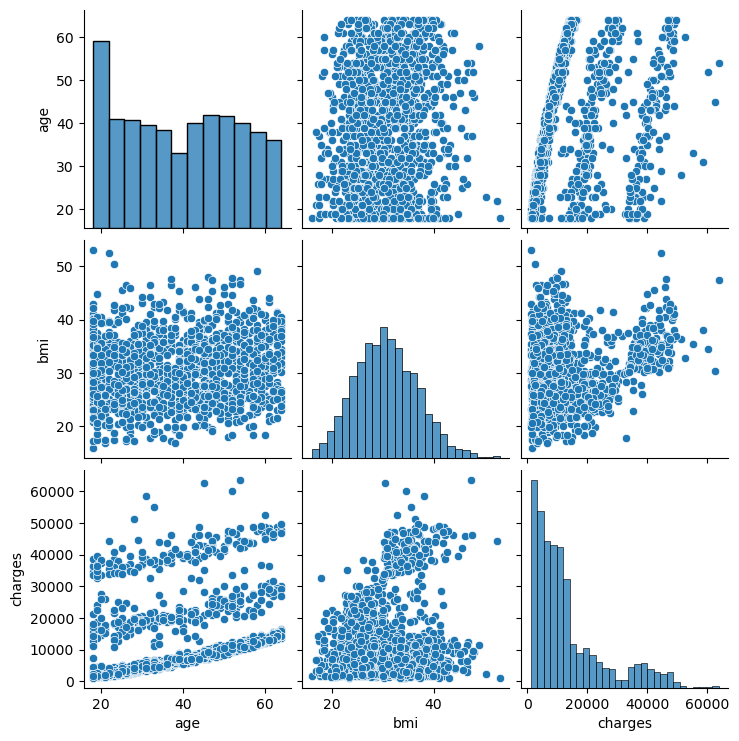

In [98]:
sns.pairplot(col_num)

from this graph, we observe the following:
    
- age looks almost normally distributed and bmi looks normally distributed. But, charges looks right skewed

- charges tend to increase when age increases

- charges tend to increase when bmi increases


Let's visualise the distribution 

In [83]:
col = []
for i in col_num.columns:
    col.append(i)
col

['age', 'bmi', 'charges']

In [86]:
def distplot(columns, data, k, t, a, b, c, d):
    plt.figure(figsize = (k, t), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.distplot(data[i], color = 'r')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()
            
            

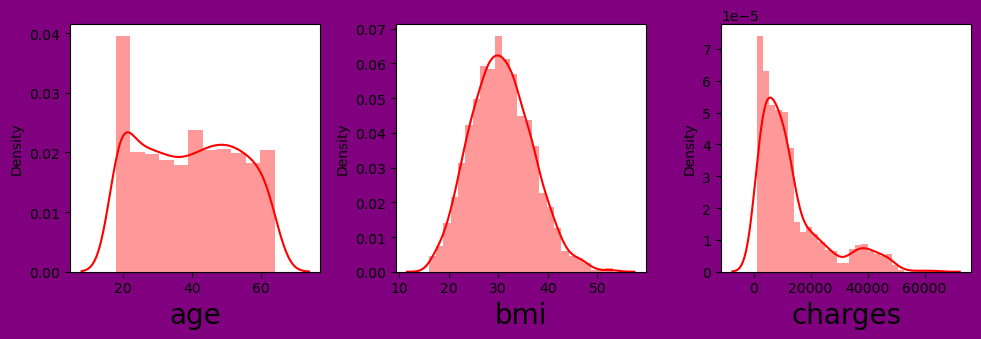

In [94]:
distplot(col, col_num, 10, 3.5, 3, 1, 3, 20)

In [99]:
col_num.skew()

age        0.054781
bmi        0.283914
charges    1.515391
dtype: float64

we can confirm that 'charges' is the only skewed column. So, we will remove skewness from this column.

Checking for outliers

In [104]:
def box(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 7), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

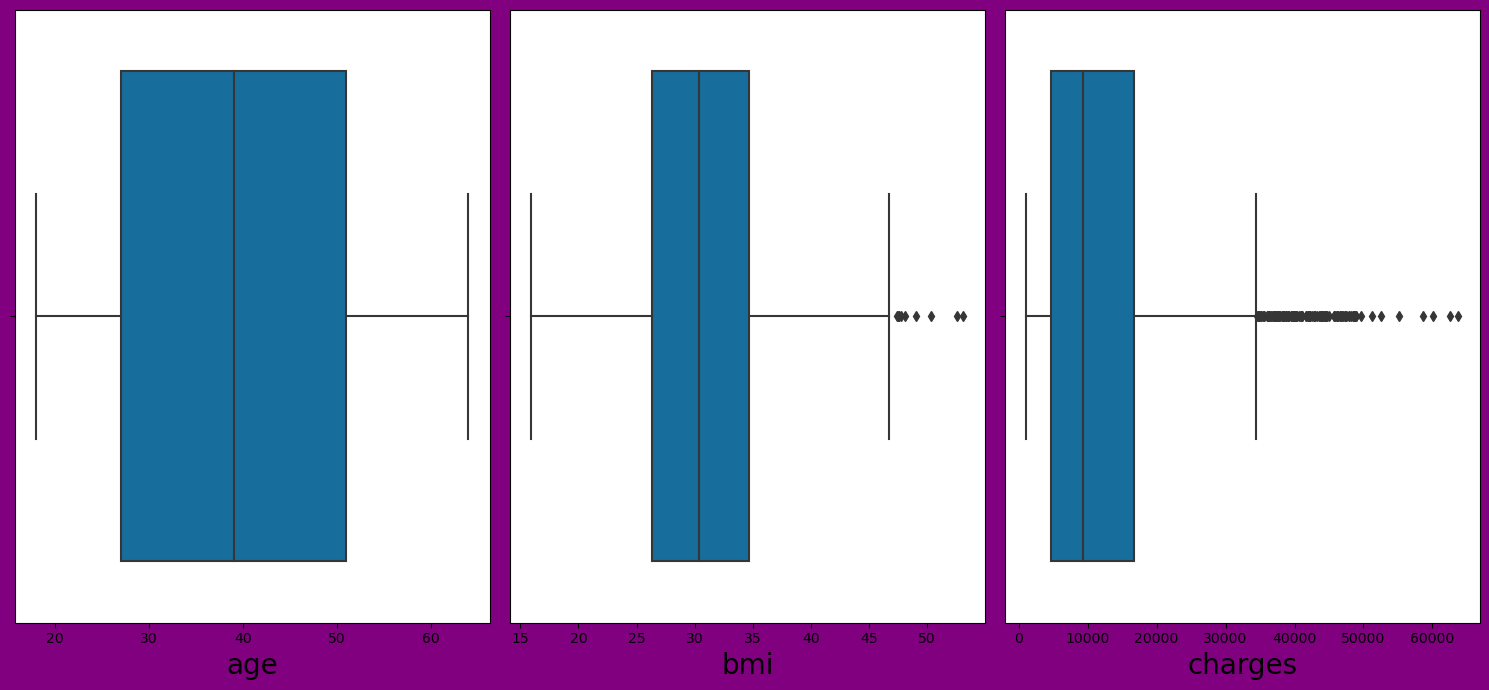

In [105]:
box(col, col_num, 3, 1, 3, 20)

bmi and chaarges contain outliers

In [129]:
# removing outliers using IQR
Q1 = col_num.quantile(0.25)

Q3 = col_num.quantile(0.75)

IQR = Q3-Q1

x = Q1-1.5*IQR
y = Q3+1.5*IQR

In [130]:
x

age           -9.000000
bmi           13.675000
charges   -13120.716175
dtype: float64

In [131]:
y

age           87.000000
bmi           47.315000
charges    34524.777625
dtype: float64

In [132]:
df1 = df[~((df > y) | (df < x)).any(axis = 1)]



In [133]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [127]:
df.shape

(1337, 7)

In [134]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [149]:
df1.describe()

,age,bmi,charges
count,1192.000000,1192.000000,1192.000000
mean,38.998322,29.998033,9949.235039
std,14.057457,5.869310,7250.376386
min,18.000000,15.960000,1121.873900
25%,26.000000,25.800000,4425.455588
50%,39.000000,29.717500,8411.754950
75%,51.000000,33.770000,12979.854925
max,64.000000,46.750000,34472.841000


In [135]:
#percentage of data lost

print('data lost percentage is: ', (col_num.shape[0]-df1.shape[0])/col_num.shape[0]*100)

data lost percentage is:  10.845175766641734


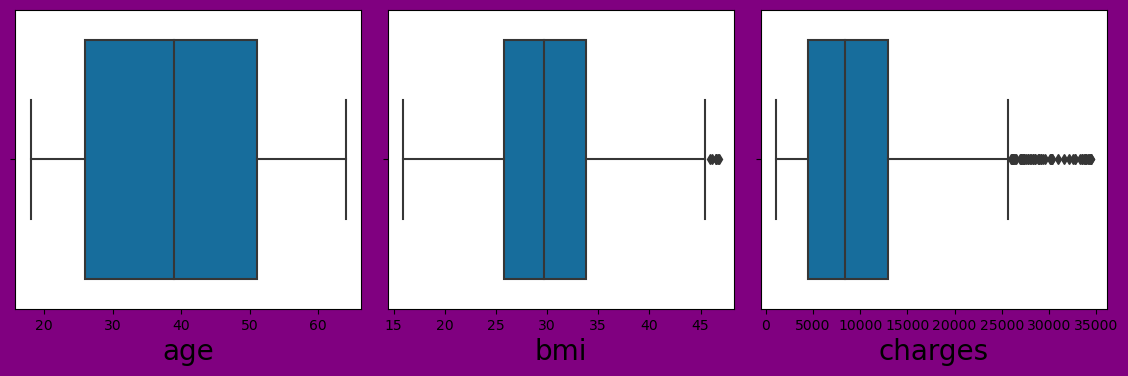

In [182]:
c_num = df1[['age', 'bmi', 'charges']]

col3 = []
for i in c_num.columns:
    col3.append(i)


box(col3, c_num,7, 2, 4, 20)

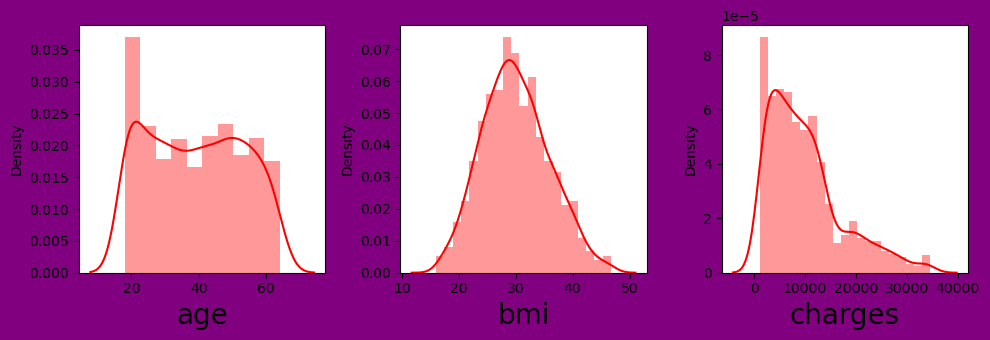

In [183]:
c_num = df1[['age', 'bmi', 'charges']]

col3 = []
for i in c_num.columns:
    col3.append(i)


distplot(col3, c_num, 10, 3.5, 3, 1, 3, 20)

In [187]:
df1.skew()

age         0.069809
bmi         0.262994
children    0.983973
charges     1.175678
dtype: float64

In [157]:
# removing outliers using zscore

from scipy.stats import zscore
    
z = np.abs(zscore(col_num))

z


,age,bmi,charges
0,1.440418,0.453160,0.297857
1,1.511647,0.509422,0.954381
2,0.799350,0.383155,0.729373
3,0.443201,1.305052,0.719104
4,0.514431,0.292456,0.777499
...,...,...,...
1333,0.767704,0.050269,0.221263
1334,1.511647,0.206053,0.914695
1335,1.511647,1.014490,0.962287
1336,1.297958,0.797524,0.931054


In [172]:
df2 = df[(z<2.5).all(axis = 1)]

In [173]:
print('data lost percentage is: ', (col_num.shape[0]-df2.shape[0])/col_num.shape[0]*100)

data lost percentage is:  4.712041884816754


In [174]:
df2.shape

(1274, 7)

In [176]:
df2.describe()

,age,bmi,charges
count,1274.000000,1274.000000,1274.000000
mean,38.700157,30.232814,11946.975892
std,13.931362,5.768671,10139.284595
min,18.000000,15.960000,1121.873900
25%,26.000000,26.030000,4583.079762
50%,39.000000,30.025000,8964.928150
75%,50.000000,34.105000,14424.125488
max,64.000000,45.900000,43254.417950


In [177]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


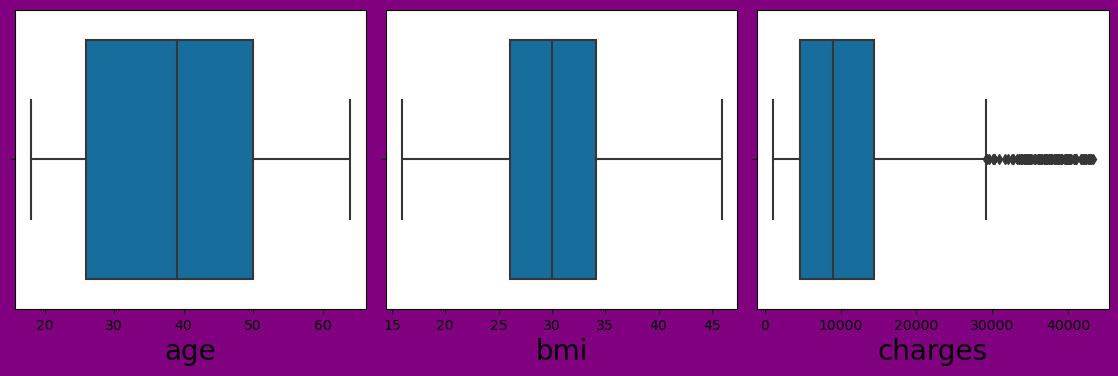

In [181]:
c_num = df2[['age', 'bmi', 'charges']]

col3 = []
for i in c_num.columns:
    col3.append(i)


box(col3, c_num,7, 2, 4, 20)

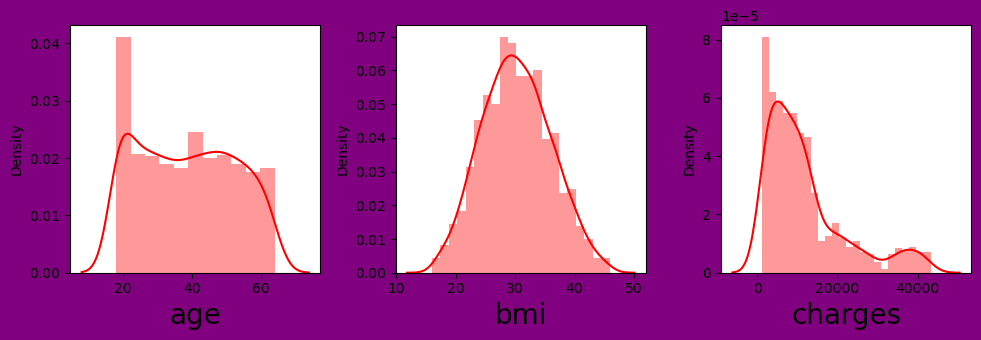

In [180]:
c_num = df2[['age', 'bmi', 'charges']]

col3 = []
for i in c_num.columns:
    col3.append(i)


distplot(col3, c_num, 10, 3.5, 3, 1, 3, 20)

In [184]:
df2.skew()

age         0.094934
bmi         0.131531
children    0.958870
charges     1.421599
dtype: float64

z score gives a better data lost percentage. So we choose  zscore.

In [188]:
df = df2

In [189]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [190]:
# deleting sex column, as it does not influence on charges

df.drop('sex', axis = 1, inplace = True)

In [191]:
df

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830
1334,18,31.920,0,no,northeast,2205.98080
1335,18,36.850,0,no,southeast,1629.83350
1336,21,25.800,0,no,southwest,2007.94500


Removing skewness

In [192]:
df.skew()

age         0.094934
bmi         0.131531
children    0.958870
charges     1.421599
dtype: float64

In [193]:
# using boxcox method
from scipy import stats

df['charges'] = stats.boxcox(df['charges'])[0]

In [194]:
df.skew()

age         0.094934
bmi         0.131531
children    0.958870
charges    -0.015632
dtype: float64

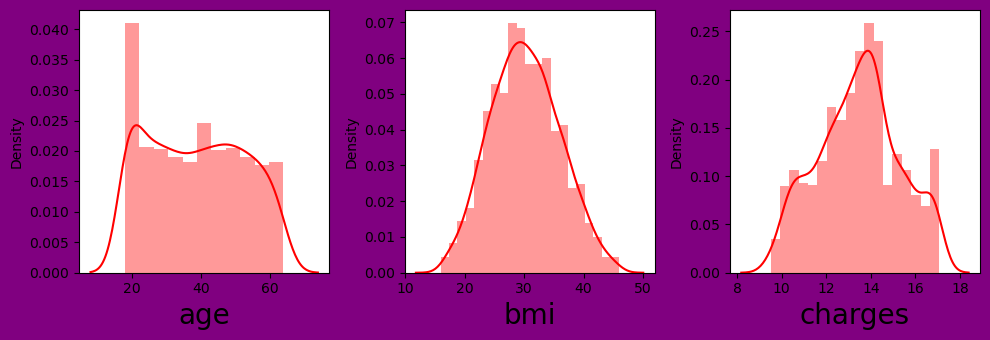

In [195]:
c_num = df[['age', 'bmi', 'charges']]

col3 = []
for i in c_num.columns:
    col3.append(i)


distplot(col3, c_num, 10, 3.5, 3, 1, 3, 20)

We can confirm that skewness has been removed from charges

In [196]:
df.describe()

,age,bmi,charges
count,1274.000000,1274.000000,1274.000000
mean,38.700157,30.232814,13.460987
std,13.931362,5.768671,1.828662
min,18.000000,15.960000,9.498701
25%,26.000000,26.030000,12.153627
50%,39.000000,30.025000,13.531457
75%,50.000000,34.105000,14.555062
max,64.000000,45.900000,17.077120


In [199]:
X.shape[0]

1274

In [200]:
Y.shape[0]

1274

Encoding categorical columns



In [202]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [203]:
df

,age,bmi,children,smoker,region,charges
0,19,27.900,0.0,1.0,3.0,14.902998
1,18,33.770,1.0,0.0,2.0,10.278601
2,28,33.000,3.0,0.0,2.0,12.094614
3,33,22.705,0.0,0.0,1.0,15.496123
4,32,28.880,0.0,0.0,1.0,11.816565
...,...,...,...,...,...,...
1333,50,30.970,3.0,0.0,1.0,13.887605
1334,18,31.920,0.0,0.0,0.0,10.736034
1335,18,36.850,0.0,0.0,2.0,10.173634
1336,21,25.800,0.0,0.0,3.0,10.559773


In [204]:
# Separating features and target

X = df.drop('charges', axis = 1)

Y = df['charges']


In [205]:
X.shape[0]

1274

In [206]:
Y.shape[0]

1274

In [207]:
# standardise X
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,age,bmi,children,smoker,region
0,-1.414642,-0.404552,-0.899020,2.170946,1.343509
1,-1.486451,0.613413,-0.070256,-0.460629,0.444543
2,-0.768364,0.479880,1.587272,-0.460629,0.444543
3,-0.409321,-1.305460,-0.899020,-0.460629,-0.454422
4,-0.481129,-0.234603,-0.899020,-0.460629,-0.454422
...,...,...,...,...,...
1269,0.811427,0.127841,1.587272,-0.460629,-0.454422
1270,-1.486451,0.292589,-0.899020,-0.460629,-1.353388
1271,-1.486451,1.147541,-0.899020,-0.460629,0.444543
1272,-1.271025,-0.768731,-0.899020,-0.460629,1.343509


In [208]:
# correlation

df.corr()

,age,bmi,children,smoker,region,charges
age,1.000000,0.085934,0.039490,-0.106520,-0.006582,0.489190
bmi,0.085934,1.000000,-0.004360,-0.083536,0.152938,0.077005
children,0.039490,-0.004360,1.000000,-0.001548,0.023045,0.155349
smoker,-0.106520,-0.083536,-0.001548,1.000000,-0.014345,0.630414
region,-0.006582,0.152938,0.023045,-0.014345,1.000000,-0.055991
charges,0.489190,0.077005,0.155349,0.630414,-0.055991,1.000000


<AxesSubplot:>

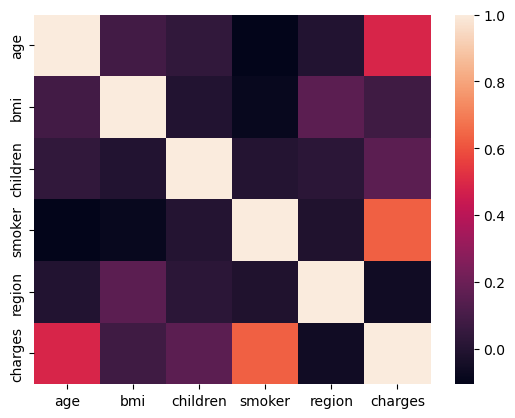

In [211]:
sns.heatmap(df.corr())

There is no multicolinearity issue

In [212]:
df.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.630414
age         0.489190
children    0.155349
bmi         0.077005
region     -0.055991
Name: charges, dtype: float64

In [217]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(X.columns)):
    z.append(variance_inflation_factor(X.values, i))
Vif = pd.DataFrame(z)
Vif['Features'] = X.columns

Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)



In [218]:
Vif

,VIF Values,Features
0,1.019722,age
1,1.037698,bmi
2,1.002245,children
3,1.017230,smoker
4,1.025007,region


All the Vif are 1, so no column to drop

# Modelling

In [224]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn .metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

In [232]:
# training the data on each algorithm and CV

L = LinearRegression()
R = RandomForestRegressor()
G = GradientBoostingRegressor()
D = DecisionTreeRegressor()
K = KNN()
l = Lasso()


Mod = [L,R,G,D,K,l]

for model in Mod:
    model.fit(X_train,Y_train)
    pred_model = model.predict(X_test)
    score = cross_val_score(model,X,Y, cv = 5, scoring = 'r2')
    print('R2_score: ', r2_score(Y_test, pred_model))
    print('Mean absolute error: ', mean_absolute_error(Y_test, pred_model))
    print('Mean squared error: ', mean_squared_error(Y_test, pred_model))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(Y_test, pred_model)))
    print(score)
    print(score.mean())
    print('The difference between R2 score and cross validation score for ', model, 'is: ', (r2_score(Y_test, pred_model) - score.mean())*100)
    print('\n')
    



R2_score:  0.7551024908548188
Mean absolute error:  0.6093491152568006
Mean squared error:  0.8960347570372296
Root mean squared error:  0.9465911245290807
[0.7735372  0.65613984 0.81341838 0.73783402 0.70076931]
0.7363397496147456
The difference between R2 score and cross validation score for  LinearRegression() is:  1.8762741240073266


R2_score:  0.7604657761120905
Mean absolute error:  0.49627817853604483
Mean squared error:  0.8764114867998344
Root mean squared error:  0.9361685141040764
[0.80223326 0.64676224 0.82807883 0.80247286 0.75307094]
0.7665236250698633
The difference between R2 score and cross validation score for  RandomForestRegressor() is:  -0.6057848957772727


R2_score:  0.8018039941771873
Mean absolute error:  0.44969962485452136
Mean squared error:  0.7251625814532617
Root mean squared error:  0.8515647840612374
[0.84982775 0.69348758 0.88011119 0.81236115 0.78322015]
0.8038015649954643
The difference between R2 score and cross validation score for  GradientBoosti

In [ ]:
Lasso has the least difference and the highest MAE. Because MAE is not too high, we select Lasso as our best model

In [245]:
# hypertune Lasso

my_model = Lasso(alpha = 0.01, fit_intercept = True, positive = False, random_state = 3)
my_model.fit(X_train, Y_train)
pred = my_model.predict(X_test)
print('R2_score: ', r2_score(Y_test, pred_model)*100)
print('Mean absolute error: ', mean_absolute_error(Y_test, pred_model))
print('Mean squared error: ', mean_squared_error(Y_test, pred_model))
print('Root mean squared error: ', np.sqrt(mean_squared_error(Y_test, pred_model)))

R2_score:  7.096045935045526
Mean absolute error:  1.5156541226385298
Mean squared error:  3.3991840994609577
Root mean squared error:  1.8436876360872407


In [246]:
import pickle

pickle.dump(my_model, open('Insurance_Romuald.pkl', 'wb'))

In [250]:
saved_model = pickle.load(open('Insurance_Romuald.pkl', 'rb'))

In [251]:
saved_model.predict(X_test)

array([11.88479454, 14.17251902, 12.45840285, 14.49467263, 15.8416779 ,
       12.74636599, 14.43950872, 11.48506776, 11.20597631, 15.45403146,
       12.06991944, 14.75854925, 11.45948327, 16.497618  , 12.57554865,
       16.07362892, 13.70632159, 15.42530307, 13.90113089, 13.35725225,
       11.19217049, 17.1775062 , 13.47469201, 12.76941988, 11.81921128,
       13.47975154, 12.75369505, 17.18910845, 13.82059821, 15.85591901,
       11.09434347, 12.84677795, 13.89670445, 12.09860061, 12.78709336,
       12.56656044, 12.85601884, 14.10993513, 12.87456222, 16.69674336,
       12.37184235, 14.54044499, 15.39967785, 11.41270882, 15.35518673,
       13.72389995, 11.75931788, 13.82643478, 13.89471567, 12.70485599,
       12.02863429, 13.89033917, 12.72830777, 11.85128082, 12.40274192,
       11.31835819, 13.42807802, 15.01258155, 12.35392433, 14.1207235 ,
       11.37639139, 13.63001311, 12.49780752, 12.99830899, 12.52057458,
       12.35096841, 12.25438227, 12.57240968, 12.97279866, 14.14

In [252]:
Y_test

108     11.234495
839     14.263798
1005    12.087403
1223    15.890992
1100    14.888654
          ...    
1212    10.253771
371     14.159569
967     13.162629
524     16.783041
1290    13.053761
Name: charges, Length: 319, dtype: float64